In [3]:
import matplotlib.pyplot as plt

speeds = ['T50', 'T60', 'T75']
models = ['160x120x3', '80x60x3', '40x30x3']
periods = [5, 10, 20, 40]

In [4]:
# Data 1

data = {
    'T50': {
        '160x120x3': {
            5: 75,
            10: 171,
            20: 300,
            40: 300
        },
        '80x60x3': {
            5: 61,
            10: 81,
            20: 300,
            40: 300
        },
        '40x30x3': {
            5: 17,
            10: 63,
            20: 92,
            40: 300
        }
    },
    'T60' : {
        '160x120x3': {
            5: 50,  # 24, 18, 8, 50
            10: 97,  # 36, 20, 97, 48
            20: 300,
            40: 300 # 71, 19, 364,   
        },
        '80x60x3': {
            5: 26, # 13, 6, 11, 26, 6
            10: 18, # 12, 14, 14, 18
            20: 139, # 26, 31, 80
            40: 206, # 206, 19, 45, 11
        },
        '40x30x3': {
            5: 15, # 8, 8, 8, 15
            10: 21, # 21, 13, 35, 8
            20: 41, # 41, 8, 29, 15
            40: 48 # 15, 26, 34, 48
        }      
    },
    'T75' : {
        '160x120x3': {
            5: 11,
            10: 29,
            20: 57,
            40: 63
        },
        '80x60x3': {
            5: 15,
            10: 32,
            20: 44,
            40: 19
        },
        '40x30x3': {
            5: 11,
            10: 20,
            20: 14,
            40: 5
        }      
    }
}


In [14]:
# K2 data 

ondevice_data = {
    'T50': {
        '80x60x3-k2-ondevice': { # 42ms
            20: 92, # 33, 36, 92, 10,
        },
        '40x30x3-k2-ondevice': { # 9ms
            100: 144, # 59, 144, 103, 23, 85 
        }
    },
    'T60': {
        '160x120x3-k2-ondevice': { # 98ms
            10: 42, # 11, 42, 9, 20
        },
        '80x60x3-k2-ondevice': { # 42ms
            20: 84, # 84,36,74,49           # 13, 14, 80?, 26
        },
        '40x30x3-k2-ondevice': { # 9ms
            100: 70, # 4, 29, 70, 39 
        }
    },
    'T70': {
        '80x60x3-k2-ondevice': { # 42ms
            20: 24, # 5, 14, 24, 4
        },        
        '40x30x3-k2-ondevice': { # 9ms
            100: 25, # 19, 25, 13, 7 
        }
    }, 
    'T75': {
        '80x60x3-k2-ondevice': { # 42ms
            20: 39 # 29, 5, 21, 4, 
        },        
        '40x30x3-k2-ondevice': { # 9ms
            100: 19, # 19, 19, 12, 8
        }
    }
}
data = {
    'T50': {
        '160x120x3-k2': {
             5:  49,  # 21, 39, 7, 49
            10: 300, #  7, 45, 28, 24, 300
            20: 300, # 47, 159, 300
            40: 300  #          300
        },
        '80x60x3-k2': {
            5: 20, # 17, 13, 20, 5,
            10: 169, # 24, 29, 26, 145, 169
            20: 188 , # 30, 32, 35, 55, 188 
            40: 232 # 25, 7, 156, 232, 

        },
        '40x30x3-k2': {
            5: 9, # 4, 5, 8, 9, 8 
            10: 29, # 15, 3, 29, 27, 16
            20: 32, # 18, 21, 30, 32, 30
            40: 100  # 18, 62, 100, 42, 10
        }
    },
    'T60' : {
        '160x120x3-k2': {
            5: 34,  # 16, 6, 34, 22
            10: 179,  # 62, 18, 29, 179
            20: 237, # 126, 237, 34,
            40: 300  # 300
        },

        '80x60x3-k2': {
            5: 12, # 8, 12, 7, 4, 
            10: 50, # 20, 33, 13, 50
            20: 118, # 28, 118, 26, 16
            40: 136 # 12, 136, 59, 91
        },
        '40x30x3-k2': {
            5: 17, # 6, 16, 17, 8
            10: 16, # 9, 16, 11, 13, 
            20: 28, # 6, 6, 3, 28, 
            40: 21, # 21, 22, 8, 11
        }      
    },
    'T75' : {
        '160x120x3-k2': {
            5: 6, # 3, 3, 4, 6, 
            10: 42, # 42, 18, 9, 4, 
            20: 65, # 6, 5, 28, 14, 65
            40: 172 # 12, 16, 62, 52, 172
        },
        '80x60x3-k2': {
            5: 5, # 4, 3, 5, 4,
            10: 16,  # 3, 5, 10, 4, 16 
            20: 20, # 20, 4, 10, 9
            40: 16  # 4, 4, 6, 6, 16, 
        },
        '40x30x3-k2': {
            5: 4, # 4, 2, 4, 4
            10: 11, # 6, 4, 11, 3
            20: 9, # 2.4, 9, 3
            40: 4  # 4, 2, 4, 4
        }      
    }
}


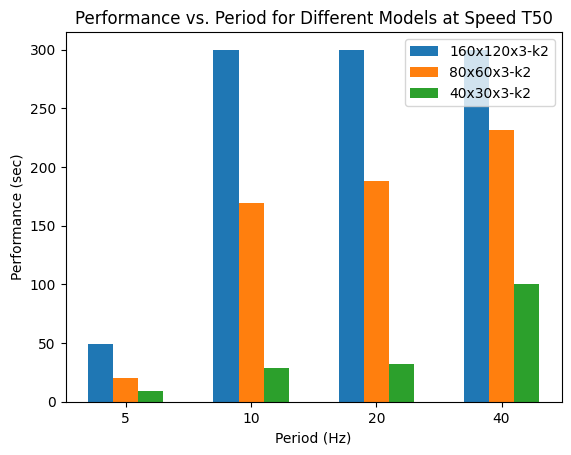

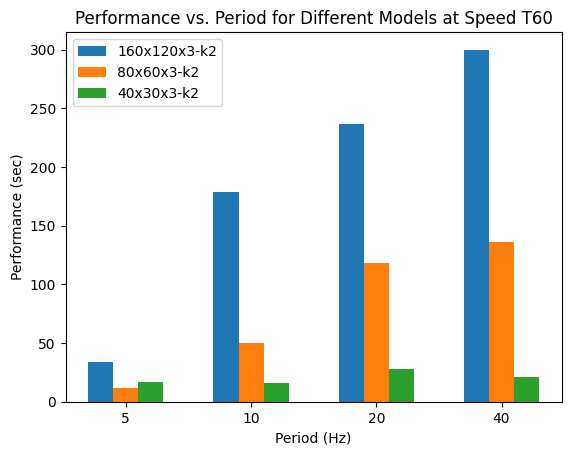

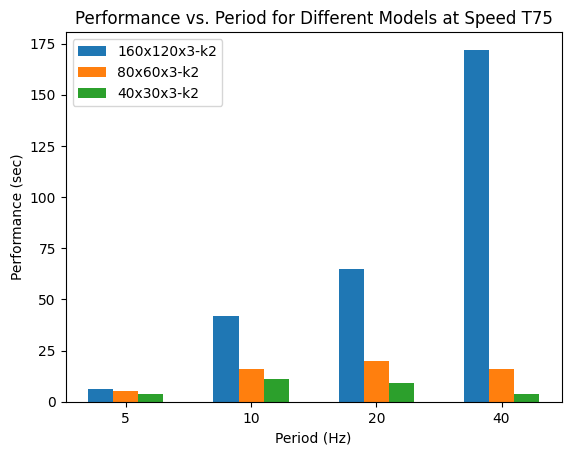

In [15]:
import numpy as np
# Convert the periods to strings for better x-axis labeling
periods_str = [str(p) for p in periods]

# Plotting with a bar chart
bar_width = 0.2
for j, speed in enumerate(data.keys()):
    for i, model in enumerate(data[speed].keys()):
        plt.bar(np.arange(len(data[speed][model].keys())) + i * bar_width, [data[speed][model][p] for p in data[speed][model].keys()], width=bar_width, label=model)

    # Adding labels and title
    plt.xlabel('Period (Hz)')
    plt.ylabel('Performance (sec)')
    plt.title('Performance vs. Period for Different Models at Speed ' + speed)
    # plt.ylim(0, 350)

    # Adding legend
    plt.legend()

    # Set x-axis ticks and labels
    plt.xticks(np.arange(len(periods)) + (len(models) - 1) * bar_width / 2, periods_str)

    # Display the plot
    plt.show()

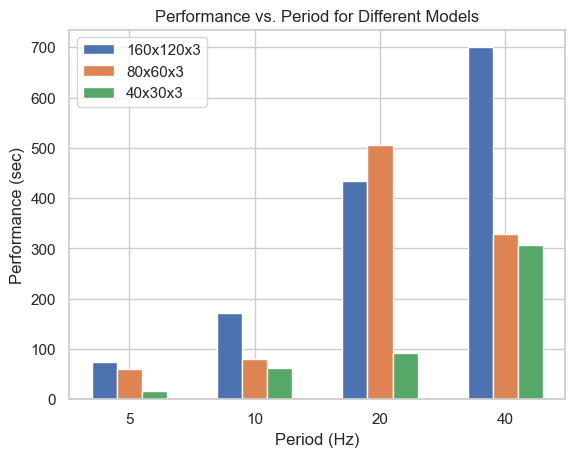

In [42]:
# Prepare data for bar chart
bar_width = 0.2
index = np.arange(len(periods))
offset = -bar_width * (len(models) - 1) / 2

# Plotting bar chart
for i, model in enumerate(models):
    performance = [data[model][p] for p in periods]
    plt.bar(index + offset, performance, width=bar_width, label=model)
    offset += bar_width

# Set x-axis ticks and labels
plt.xlabel('Period (Hz)')
plt.ylabel('Performance (sec)')
plt.title('Performance vs. Period for Different Models')
plt.xticks(index, periods)
plt.legend()

# Display the plot
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression

# Data
kMACs = np.array([47186, 14202, 7230]).reshape(-1, 1)
latency = np.array([287, 91, 31])

# Create and fit the linear regression model
model = LinearRegression()
model.fit(kMACs, latency)

# Print the coefficients
coefficient = model.coef_[0]
intercept = model.intercept_

print("Coefficient:", coefficient)
print("Intercept:", intercept)

Coefficient: 0.006261141972300905
Intercept: -6.875679951781166
